In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
import time

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from registration_utilities import *
from annotation_utilities import *
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Gordon


No vtk


In [3]:
stack_fixed = 'MD594'
stack_moving = 'atlasV2'

In [4]:
classifier_setting = 2
warp_setting = 2

In [5]:
if warp_setting == 1:
    upstream_warp_setting = None    
    transform_type = 'affine'
elif warp_setting == 2:
    upstream_warp_setting = 1
    transform_type = 'rigid'
else:
    raise Exception('Warp setting not recognized.')

In [6]:
# train_sample_scheme = 1
# global_transform_scheme = 1

# local_transform_scheme = 1
# # 1: no regularization, structures weight the same
# # 2: with regularization, structures weight the same
# # 3: no regularization, with surround
# # 4: with regularization, with surround
# # 5: no regularization, structure weight inversely prop to size
# # 6: with regularization, structure weight inversely prop to size

# if local_transform_scheme == 1:
#     reg_weights = np.array([0.,0.,0.])
# elif local_transform_scheme == 2:
#     reg_weights = np.array([1e-6, 1e-6, 1e-6])
# elif local_transform_scheme == 3:
#     reg_weights = np.array([0.,0.,0.])
# elif local_transform_scheme == 4:
#     reg_weights = np.array([1e-4, 1e-4, 1e-4])
    
# # stack_moving = 'atlas_on_MD589'
# stack_moving = 'atlasV2'

In [7]:
volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
DataManager.load_score_volume_all_known_structures(stack=stack_fixed, classifier_setting=classifier_setting)

File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD594/score_volumes/MD594_down32_scoreVolume_outerContour_setting_2.bp
Score volume for outerContour does not exist.
File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD594/score_volumes/MD594_down32_scoreVolume_sp5_setting_2.bp
Score volume for sp5 does not exist.


In [13]:
gradient_filepath_map_f = {ind_f: \
                           DataManager.get_score_volume_gradient_filepath_template(\
                            stack=stack_fixed, structure=struct_f, setting=classifier_setting)
                           for ind_f, struct_f in label_to_structure_fixed.iteritems()}

In [9]:
# volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}

# for lm, s in volume_moving_structure_sizes.iteritems():
#     print label_to_name_moving[lm], s, 'voxels'

In [24]:
# labelIndexMap_m2f = {}
# for label_m, name_m in label_to_name_moving.iteritems():
#     labelIndexMap_m2f[label_m] = name_to_label_fixed[convert_to_original_name(name_m)]
    
# label_weights_m = {}
# for label_m, name_m in label_to_name_moving.iteritems():
#     if 'surround' in name_m:
#         if local_transform_scheme == 3 or local_transform_scheme == 4:
#             label_weights_m[label_m] = -1
#         else:
#             label_weights_m[label_m] = 0
#     else:
#         label_weights_m[label_m] = 1

# Align

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


set([12])


load gradient 12: 3.901515 seconds
overall: 3.901677 seconds
grid search: 7.986386 seconds
-inf 0.456946
grid search: 5.646227 seconds
0.456946 0.460311
grid search: 4.142373 seconds
grid search: 2.941816 seconds
0.460311 0.465997
grid search: 2.340800 seconds
grid search: 1.637957 seconds
grid search: 1.338569 seconds
grid search: 1.134012 seconds
0.465997 0.466762
grid search: 0.833251 seconds
grid search: 0.638124 seconds
grid search: 0.532896 seconds
grid search: 0.436609 seconds
grid search: 0.431678 seconds
0.466762 0.466857
grid search: 0.336391 seconds
0.466857 0.466861
grid search: 0.334694 seconds
grid search: 0.235095 seconds
grid search: 0.234609 seconds
0.466861 0.466919
grid search: 0.236409 seconds
grid search: 0.234549 seconds
grid search: 0.235507 seconds
iteration 0


params_best_upToNow [-0.2066942  -4.29926453  4.62030018  0.08493072]


step: 0.29 seconds
score: 0.466919
iteration 1
step: 0.28 seconds
score: 0.444639
iteration 2
step: 0.27 seconds
score: 0.449944
iteration 3
step: 0.27 seconds
score: 0.445421
iteration 4
step: 0.27 seconds
score: 0.465747
iteration 5
step: 0.27 seconds
score: 0.470110
iteration 6
step: 0.28 seconds
score: 0.469080
iteration 7
step: 0.27 seconds
score: 0.471682
iteration 8
step: 0.28 seconds
score: 0.470207
iteration 9
step: 0.27 seconds
score: 0.472327
iteration 10
step: 0.27 seconds
score: 0.473646
iteration 11
step: 0.27 seconds
score: 0.474024
iteration 12
step: 0.27 seconds
score: 0.474166
iteration 13
step: 0.27 seconds
score: 0.473509
iteration 14
step: 0.27 seconds
score: 0.472963
iteration 15
step: 0.27 seconds
score: 0.473497
iteration 16
step: 0.27 seconds
score: 0.474019
iteration 17
step: 0.27 seconds
score: 0.474144
iteration 18
step: 0.27 seconds
score: 0.474141
iteration 19
step: 0.28 seconds
score: 0.474456
iteration 20
step: 0.28 seconds
score: 0.474458
iteration 21
s

[[  9.93055187e-01  -1.16936597e-01  -1.29316537e-02  -2.33307212e-01]
 [  1.17648910e-01   9.87369584e-01   1.06113325e-01  -2.85295610e+00]
 [  3.59790398e-04  -1.06897783e-01   9.94269951e-01   7.51494553e+00]]


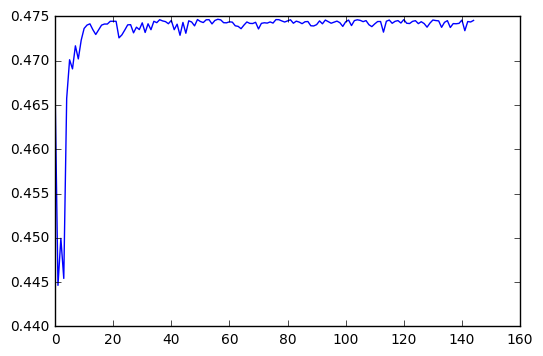

0.474679499865 0.474552571774


In [12]:
trial_num = 1

for trial_idx in range(trial_num):
    
    if trial_idx in [0, 1]:
        upstream_trial_idx = 0
        
    volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                         classifier_setting_m=classifier_setting,
                                                                         classifier_setting_f=classifier_setting,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         trial_idx=upstream_trial_idx,
                                                                         sided=True)

    structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
    label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
    volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

    label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                         for label_m, name_m in label_to_structure_moving.iteritems()}

    # for structure in all_known_structures_sided:
    for structure in ['IC']:

        try:

            label_mapping_m2f_one_structure = {label_m: label_f for label_m, label_f in label_mapping_m2f.iteritems()
                                               if label_to_structure_moving[label_m] == structure}

            volume_moving_one_structure = {l: v for l, v in volume_moving.items() 
                                           if label_to_structure_moving[l] == structure}

            aligner = Aligner4(volume_fixed, volume_moving_one_structure, 
                               labelIndexMap_m2f=label_mapping_m2f_one_structure)

            aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                                 indices_m=[structure_to_label_moving[structure]])

            aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f) # 120s = 2 mins

            T, scores = aligner.optimize(type=transform_type, 
                                         max_iter_num=1000, history_len=50, terminate_thresh=1e-5,
                                        grid_search_iteration_number=20,
                                         grid_search_sample_number=1000,
                                         grad_computation_sample_number=1e5,
                                         lr1=10, lr2=0.1,
                                        std_tx=50, std_ty=50, std_tz=100, std_theta_xy=np.deg2rad(10),
                                        epsilon=1e-8)

            print T.reshape((3,4))
            plt.figure();
            plt.plot(scores);
            plt.show();
            print max(scores), scores[-1]

            params_fp = \
            DataManager.get_alignment_parameters_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                          classifier_setting_m=classifier_setting,
                                                          classifier_setting_f=classifier_setting,
                                                          warp_setting=warp_setting,
                                                          param_suffix=structure,
                                                          trial_idx=trial_idx)

            DataManager.save_alignment_parameters(params_fp, T, 
                                                  aligner.centroid_m, aligner.centroid_f,
                                                  aligner.xdim_m, aligner.ydim_m, aligner.zdim_m, 
                                                  aligner.xdim_f, aligner.ydim_f, aligner.zdim_f)

            score_plot_fp = \
            DataManager.get_alignment_score_plot_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                          classifier_setting_m=classifier_setting,
                                                          classifier_setting_f=classifier_setting,
                                                          warp_setting=warp_setting,
                                                          param_suffix=structure,
                                                          trial_idx=trial_idx)
            fig = plt.figure();
            plt.plot(scores);
            plt.savefig(score_plot_fp, bbox_inches='tight')
            plt.close(fig)

        except Exception as e:
            sys.stderr.write('%s\n' % e)
            sys.stderr.write('Error transforming volume %s.\n' % structure)

# POLYRIGID TRANSFORM

In [27]:
annotation_structure_sizes = {s: len(parallel_where_binary(volume_annotation == name_to_label_annotation[s])) 
                              for s in structures_sided}
annotation_structure_sizes_precent = {s: float(size)/sum(annotation_structure_sizes.values()) 
                                      for s, size in annotation_structure_sizes.iteritems()}

In [175]:
annotation_structure_radius = {}
# annotation_structure_axes = {}
annotation_structure_covars = {}
for s in structures_sided:
    nzs = parallel_where_binary(volume_annotation == name_to_label_annotation[s])
    nzsc = nzs - nzs.mean(axis=0)
    C = np.dot(nzsc.T, nzsc)/float(len(nzsc))
    S, V = np.linalg.eigh(C)
#     annotation_structure_axes[s] = V
    annotation_structure_radius[s] = np.sqrt(S)
    annotation_structure_covars[s] = C
#     alpha = 1.
#     scaled_C = np.dot(np.dot(V.T, alpha*S), V)
#     annotation_structure_covars[s] = scaled_C

In [210]:
# Read Transform of each structure, do polyrigid transform

volume_m_aligned_to_f_allAnnotatedBrains = {}

stack = 'MD589'
volume_annotation = volumes_annotation[stack]

# for stack, volume_annotation in volumes_annotation.iteritems():

rigid_parameters_list = []
anchor_points = []
# sigmas = [1. for _ in structures_sided]

alpha = 1.
sigmas = [alpha * annotation_structure_covars[s] for s in structures_sided]

# weights = [1. for s in structures_sided]
weights = [annotation_structure_sizes_precent[s] for s in structures_sided]

for name_s in structures_sided:
# for name_s in ['VLL_L']:

    try:
        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_local_alignment_parameters(stack_moving=stack_moving,
                                                    moving_volume_type='score',
                                                    stack_fixed=stack_fixed,
                                                    fixed_volume_type='score',
                                                    train_sample_scheme=train_sample_scheme,
                                                    global_transform_scheme=global_transform_scheme,
                                                    local_transform_scheme=local_transform_scheme,
                                                   label=name_s,
                                                   trial_idx=1)

        rigid_parameters_list.append((tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f))
        anchor_points.append(centroid_m)
    except:
        sys.stderr.write('Cannot load parameters for %s.\n' % name_s)

In [211]:
volume_m_aligned_to_f_allAnnotatedBrains[stack] = transform_volume_polyrigid(volume_annotation, 
                                                                             rigid_parameters_list, 
                                                                             anchor_points, sigmas, 
                                                                             weights)

In [212]:
viz_dir = create_if_not_exists(DataManager.get_local_alignment_viz_dir(stack_moving=stack_moving,
                                                        stack_fixed=stack_fixed,
                                                        moving_volume_type='score',
                                                        fixed_volume_type='score',
                                                        train_sample_scheme=train_sample_scheme,
                                                        global_transform_scheme=global_transform_scheme,
                                                        local_transform_scheme=5))

In [213]:
bar = show_progress_bar(first_sec, last_sec)

for sec in range(first_sec, last_sec+1):
# for sec in range(140, 160):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
            continue

    bar.value = sec

    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    img = imread(img_fn)

#         img_fn = DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, label='7N', train_sample_scheme=train_sample_scheme)
#         img = imread(img_fn)[::4, ::4]

    viz = img.copy()

    z = voxel_z_size * (sec - 1) - zmin_vol_f
    
    ##############################################
    
#     for stack, volume_m_aligned_to_f in volume_m_aligned_to_f_allAnnotatedBrains.iteritems():

    stack = 'MD589'
    volume_m_aligned_to_f = volume_m_aligned_to_f_allAnnotatedBrains[stack]
            
    contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
    contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] 
                                         for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

#     # Draw fixed volume annotation contours
#     for ind_f, cnts_f in contours_f_on_cropped.iteritems():
#         for cnt_f in cnts_f:
#             cv2.polylines(viz, [cnt_f.astype(np.int)], True, (0,255,0), 2)

    # Draw moving volume annotation contours
    for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
        for cnt_m in cnts_m:
#             cv2.polylines(viz, [cnt_m.astype(np.int)], True, stack_colors[stack], 2)
            cv2.polylines(viz, [cnt_m.astype(np.int)], True, structure_colors[convert_name_to_unsided(label_to_name_moving[ind_m])], 1)

            # put label texts
#             label_pos = cnt_m.mean(axis=0).astype(np.int)
#             cv2.putText(viz, convert_name_to_unsided(name_s), tuple(label_pos), 
#                         cv2.FONT_HERSHEY_DUPLEX, .5, ((0,0,0)), 1)

    viz_fn = os.path.join(viz_dir, '%(stack_moving)s_over_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
    imsave(viz_fn, viz)

#     plt.figure(figsize=(10, 10));
#     plt.imshow(viz);
#     plt.show();

/oasis/projects/nsf/csd395/yuncong/brain_virtualenv/lib/python2.7/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


In [ ]:
# TRANSFORM VOLUMES

In [31]:
# Transforming each volume (only relevant structure is activated) according to computed local transforms

volume_m_aligned_to_f_allNames = {'MD589': {}, 'MD594': {}}

for name_s in structures_sided:
# for name_s in ['VLL_L']:
        
    print name_s

    try:
        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_local_alignment_parameters(stack_moving=stack_moving,
                                                    moving_volume_type='score',
                                                    stack_fixed=stack_fixed,
                                                    fixed_volume_type='score',
                                                    train_sample_scheme=train_sample_scheme,
                                                    global_transform_scheme=global_transform_scheme,
                                                    local_transform_scheme=local_transform_scheme,
                                                   label=name_s)

    except Exception as e:
        
        sys.stderr.write(e.message + '\n')
        
        tx_params = (1,0,0,0,0,1,0,0,0,0,1,0)
        centroid_m = (0,0,0)
        centroid_f = (0,0,0)
        xdim_f, ydim_f, zdim_f = (vol_fixed_xdim, vol_fixed_ydim, vol_fixed_zdim)


    for stack, volume_annotation in volumes_annotation.iteritems():
        volume_m_aligned_to_f_allNames[stack][name_s] = \
        transform_volume(vol=volume_annotation==name_to_label_annotation[name_s], 
                           global_params=tx_params, 
                           centroid_m=centroid_m, 
                           centroid_f=centroid_f,
                          xdim_f=xdim_f,
                          ydim_f=ydim_f,
                          zdim_f=zdim_f)

5N_L


/oasis/projects/nsf/csd395/yuncong/brain_virtualenv/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6



5N_R


6N_L
6N_R


7N_L


7N_R


7n_L


7n_R


Amb_L


Amb_R


LC_L


LC_R


LRt_L


LRt_R


KeyboardInterrupt: 

In [ ]:
bar = show_progress_bar(first_sec, last_sec)

# for sec in range(first_sec, last_sec+1):
for sec in range(140, 160):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
            continue

    bar.value = sec

    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    img = imread(img_fn)

#         img_fn = DataManager.get_scoremap_viz_filepath(stack=stack_fixed, section=sec, label='7N', train_sample_scheme=train_sample_scheme)
#         img = imread(img_fn)[::4, ::4]

    viz = img.copy()

    z = voxel_z_size * (sec - 1) - zmin_vol_f
    
    ##############################################
    
    for stack, x in volume_m_aligned_to_f_allNames.iteritems():
        for name_s, volume_m_aligned_to_f in x.iteritems():
        
            contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
            contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] 
                                                 for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

        #     # Draw fixed volume annotation contours
        #     for ind_f, cnts_f in contours_f_on_cropped.iteritems():
        #         for cnt_f in cnts_f:
        #             cv2.polylines(viz, [cnt_f.astype(np.int)], True, (0,255,0), 2)

            # Draw moving volume annotation contours
            for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
                for cnt_m in cnts_m:
                    cv2.polylines(viz, [cnt_m.astype(np.int)], True, stack_colors[stack], 2)
                    
                    # put label texts
                    label_pos = cnt_m.mean(axis=0).astype(np.int)
                    cv2.putText(viz, convert_name_to_unsided(name_s), tuple(label_pos), 
                                cv2.FONT_HERSHEY_DUPLEX, .5, ((0,0,0)), 1)

    viz_fn = os.path.join(viz_dir, '%(stack_moving)s_over_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
#     imsave(viz_fn, viz)

#     plt.figure(figsize=(10, 10));
#     plt.imshow(viz);
#     plt.show();